<div style="text-align:center">
  <h3 style="color:red">Amna Muzaffar:04072013003</h3>
  <h3 style="color:red">Laiba bibi:04072013016</h3>
   <h3 style="color:red">G7:Final Assignment</h3>
</div>


<h1 style='color:#196178'>Import Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2 style='color:#196178'>Loading Data</h2>

In [2]:
records=np.loadtxt("data.csv",delimiter=";",dtype="str")
data=np.delete(records,0,axis=0)
finaldata=data[:,7:13]

<h2 style='color:#196178'>Pre-Processing</h2>
<h3 style='color:#196178'>Standarize and Normalize data</h3>
<p>Data preprocessing such as scaling/normalization is typically useful for 
linear models to accelerate the training convergence.</p>

In [3]:
from sklearn.preprocessing import normalize, StandardScaler
standarddata=StandardScaler().fit_transform(finaldata)
normalizedata=normalize(standarddata,norm="l1")


 <h3 style='color:#196178'>Feature matrix and Class label</h3>
 <p>Here X is our Feature Matrix for Anaylysis and Y is used after model is trained to compare accuracy.</p>

In [4]:
X=normalizedata
Y=data[:,32]

<h2 style='color:#196178'>Dataset Train/Test Split</h2>
<p>The dataset is now ready for building the classification models, we first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).</p>

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (116, 6) Y_train.shape= (116,)
X_test.shape= (29, 6) Y_test.shape= (29,)


<h1 style='color:#196178'>Classification Algorithms</h1>


<h2 style='color:#196178'>1.Decision Tree Classifier Model</h2> 
<p>A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into  similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar.It is simple to understand and visualise, requires little data preparation, and can handle both numerical and categorical data. Their simple reasoning, along with their hierarchical structure, makes this an ideal candidate for usage, even by people unrelated to machine learning.They are fast, efficient, and work with all kinds of data, both numerical and categorical, discrete or continuous.</p>
<h3 style='color:#196178'>Modeling</h3> 
 <p>We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>std_Tree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i>, <i> max_depth="entropy" </i> and <i> random_state=4 </i>  so we can see the information gain of each node.And random state to train model similar at each run</p>

In [6]:
from sklearn.tree import DecisionTreeClassifier
std_tree=DecisionTreeClassifier(max_depth=4,criterion="entropy",random_state=4)


Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> y_train </b>

In [7]:
std_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=4)

<h3 style='color:#196178'>Prediction</h3> 

In [8]:
pred_tree=std_tree.predict(X_test)

Now we can print out <b>pred_Tree</b> and <b>y_test</b> if we want to visually compare the predictions to the actual values.


In [9]:
print("Actual Values:",y_test[0:5])
print("Predicted Values:",pred_tree[0:5])

Actual Values: ['3' '5' '1' '3' '1']
Predicted Values: ['5' '1' '5' '2' '2']


<h3 style='color:#196178'>Visualization</h3> 

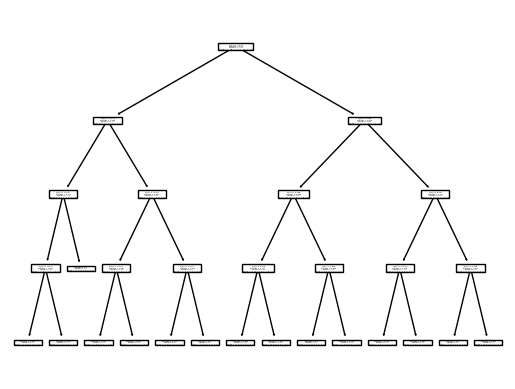

In [10]:
import sklearn.tree as tree
tree.plot_tree(std_tree)
plt.show()

<h3 style='color:#196178'>Evaluation</h3> 
   Now we will import <b>metrics(Precision and Recall)</b> from sklearn and check the accuracy of our model.
 <h4 style='color:#196178'>Precision and Recall</h4> 

In [11]:
from sklearn.metrics import precision_score,recall_score
precision_tree=precision_score(y_test,pred_tree,average='macro',zero_division=1)
recall_tree=recall_score(y_test,pred_tree,average='macro',zero_division=1)
print("Precision of Decision Tree Model Train is:",precision_tree)
print("Recall of Decision Tree Model Train is:",recall_tree)

Precision of Decision Tree Model Train is: 0.2967032967032967
Recall of Decision Tree Model Train is: 0.07857142857142857


<h2 style='color:#196178'>2.K Nearest Neigbour</h2> 
<p>The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.It's ideal for non-linear data since there's no assumption about underlying data and  can naturally handle multi-class cases and can perform well with enough representative data.It performs good with smaller daat set as we can see in our case that we have less data and  have less number of features and most importantly we have mutliclass labesl so it will work better and will provide better results. </p>
<h3 style='color:#196178'>Modeling</h3>

 <p>We will first create an instance of the <b>KNeighborClassifier</b> called <b>std_Tree</b>.<br>
    Inside of the classifier, specify <i> n_neigbors=4 </i>
 

In [12]:
from sklearn.neighbors import KNeighborsClassifier
neigh=KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

<h3 style='color:#196178'>Prediction</h3> 

In [13]:
pred_vals=neigh.predict(X_test)

<h3 style='color:#196178'>Evaluation</h3> 
   Now we will import <b>metrics(Precision and Recall)</b> from sklearn and check the accuracy of our model.
 <h4 style='color:#196178'>Precision and Recall</h4> 

<h3 style='color:#196178'>KNN with best Value of K</h3> 
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user.We can choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

In [14]:
ks=10
prec_vals=np.zeros((ks-1))
recall_vals=np.zeros((ks-1))
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred_vals=neigh.predict(X_test)
    prec_vals[n-1] = precision_score(y_test,pred_vals,average='macro',zero_division=1)
    recall_vals[n-1] = recall_score(y_test,pred_vals,average='macro',zero_division=1)
precision_neigh=prec_vals.max()
recall_neigh=recall_vals.max()
print( "The best Precsion is with",precision_neigh, "with k=", prec_vals.argmax()+1) 
print( "The best Recall is with", recall_neigh, "with k=", recall_neigh.argmax()+1) 


The best Precsion is with 0.4888392857142857 with k= 8
The best Recall is with 0.22142857142857142 with k= 1


<h2 style='color:#196178'>Comparison of Decision Trees and K Nearest Neighbor</h2> 

In [15]:
from tabulate import tabulate
# Create a list of lists for the table
table_data = [
    ["Decision Tree Classifier", precision_tree, recall_tree],
    ["K Nearest Neighbor", precision_neigh, recall_neigh]
]
# Format and print the table
table = tabulate(table_data, headers=["Model", "Precision", "Recall"], tablefmt="grid")
print(table)

+--------------------------+-------------+-----------+
| Model                    |   Precision |    Recall |
+==========================+=============+===========+
| Decision Tree Classifier |    0.296703 | 0.0785714 |
+--------------------------+-------------+-----------+
| K Nearest Neighbor       |    0.488839 | 0.221429  |
+--------------------------+-------------+-----------+


<h3 style='color:#196178'>Conclusion</h3><p>Based on the provided precision and recall values, it is challenging to determine a clear winner between the Decision Tree Classifier and the K Nearest Neighbor algorithm. 


Based on precision, the K Nearest Neighbor algorithm has a higher value compared to the Decision Tree Classifier. Similarly, based on recall, the K Nearest Neighbor algorithm has a higher value compared to the Decision Tree Classifier.

Considering both precision and recall, the K Nearest Neighbor algorithm outperforms the Decision Tree Classifier in terms of correctly labeling positive instances and overall performance.</p>

<p style='color:red'><b>Note:We have not used Naive Bayes Alogrithm becauese it is mainly used in text classification</b></p>

<h1 style='color:#196178'>Clustering Algorithms</h1>

<h2 style='color:#196178'>1.K Means</h2> 
<p>K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.<br>
It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training.</p>

<h3 style='color:#196178'>Modeling</h3> 

In [16]:
from sklearn.cluster import KMeans
n_clusters=3
K_means=KMeans(init="k-means++",n_clusters=n_clusters,n_init=12)
K_means.fit(X)
labels=np.array(K_means.labels_)
labels=labels.reshape(-1,1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<h3 style='color:#196178'>Prediction</h3> 

In [17]:
k_mean_pred=K_means.predict(X)

<h3 style='color:#196178'>Insights</h3> 
We assign the labels to each row in the dataframe.

In [18]:
X_new=np.append(finaldata,labels,axis=1)
X_new

array([['2', '1', '1', ..., '1', '2', '0'],
       ['2', '1', '1', ..., '2', '3', '0'],
       ['2', '2', '4', ..., '2', '2', '1'],
       ...,
       ['2', '1', '1', ..., '3', '4', '0'],
       ['1', '5', '2', ..., '4', '4', '1'],
       ['2', '3', '1', ..., '3', '1', '0']], dtype='<U13')

<i>Here last column represents to which cluster this data object belongs.</i>

<h3 style='color:#196178'>Visualization</h3> 
<p>As we cannot  directly plot clusters if we have more than 3 columns.So we just do this for two features</p>

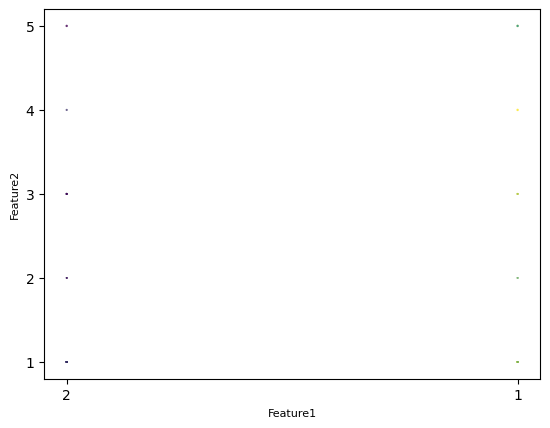

In [19]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X_new[:,0 ], X_new[:,1], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Feature1', fontsize=8)
plt.ylabel('Feature2', fontsize=8)
plt.show()


<h3 style='color:#196178'>Evaluation</h3> 

In [20]:
from sklearn.metrics import silhouette_score
kmean_acc=silhouette_score(X,k_mean_pred)

<h2 style='color:#196178'>2.Hierarchical Clustering</h2> 
<p>Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster.In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.Sometimes the results of K-means clustering and hierarchical clustering may look similar, but they both differ depending on how they work. As there is no requirement to predetermine the number of clusters as we did in the K-Means algorithm. </p>

<h3 style='color:#196178'>Modeling</h3> 

In [21]:
from sklearn.cluster import AgglomerativeClustering
hierar_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
labels=np.array(K_means.labels_)
labels=labels.reshape(-1,1)

<h3 style='color:#196178'>Insights</h3> 
We assign the labels to each row in the dataframe.

In [22]:
X_new=np.append(finaldata,labels,axis=1)
X_new

array([['2', '1', '1', ..., '1', '2', '0'],
       ['2', '1', '1', ..., '2', '3', '0'],
       ['2', '2', '4', ..., '2', '2', '1'],
       ...,
       ['2', '1', '1', ..., '3', '4', '0'],
       ['1', '5', '2', ..., '4', '4', '1'],
       ['2', '3', '1', ..., '3', '1', '0']], dtype='<U13')

<i>Here last column represents to which cluster this data object belongs.</i>

<h3 style='color:#196178'>Visualization</h3> 

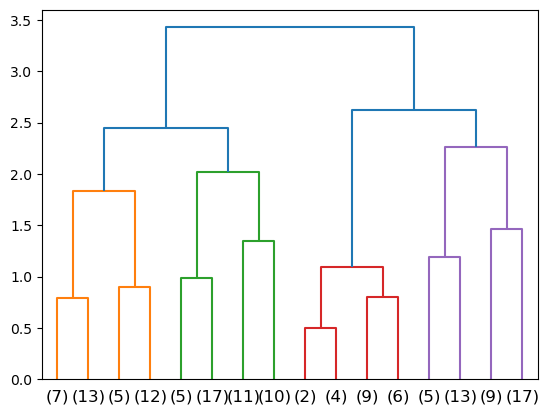

In [23]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plot_dendrogram(hierar_clustering, truncate_mode="level", p=3)

<h2 style='color:#196178'>Comparison of K Means and Hierarchical Clustering</h2> 


K-means clustering is a partition-based algorithm that requires specifying the number of clusters in advance and aims to minimize the within-cluster sum of squares. It is computationally efficient but sensitive to initial centroid placement. Hierarchical clustering, on the other hand, creates a hierarchy of clusters without the need for predefining the number of clusters. It provides a visual representation of the clustering structure but can be computationally expensive. The choice between the two depends on the dataset and specific requirements.

<p style='color:red'><b>Note:Density-based clustering is not chosen for student performance data with numerical attributes because it is more suitable for datasets with irregular shapes and varying densities, whereas numeric data typically aligns better with the assumptions of K-means and hierarchical clustering algorithms.</b></p>